<a href="https://colab.research.google.com/github/RhoYul/Machine_Learning_Term_Project/blob/main/ML_Song_Recommend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np

In [3]:
df_high = pd.read_csv('/content/drive/MyDrive/high_popularity_spotify_data.csv')
df_high

,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,...,instrumentalness,track_album_id,mode,key,duration_ms,acousticness,id,playlist_subgenre,type,playlist_id
0,0.592,157.969,0.521,pop,-7.777,0.1220,0.535,"Lady Gaga, Bruno Mars",3,0.0304,...,0.000000,10FLjwfpbxLmW8c25Xyc2N,0,6,251668,0.3080,2plbrEY59IikOBgBGLjaoe,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
1,0.507,104.978,0.747,pop,-10.171,0.1170,0.438,Billie Eilish,4,0.0358,...,0.060800,7aJuG4TFXa2hmE4z1yxc3n,1,2,210373,0.2000,6dOtVTDdiauQNBQEDOtlAB,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
2,0.808,108.548,0.554,pop,-4.169,0.1590,0.372,Gracie Abrams,4,0.0368,...,0.000000,0hBRqPYPXhr1RkTDG3n4Mk,1,1,166300,0.2140,7ne4VBA60CxGM75vw0EYad,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
3,0.910,112.966,0.670,pop,-4.070,0.3040,0.786,Sabrina Carpenter,4,0.0634,...,0.000000,4B4Elma4nNDUyl6D5PvQkj,0,0,157280,0.0939,1d7Ptw3qYcfpdLNL5REhtJ,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
4,0.783,149.027,0.777,pop,-4.477,0.3550,0.939,"ROSÉ, Bruno Mars",4,0.2600,...,0.000000,2IYQwwgxgOIn7t3iF6ufFD,0,0,169917,0.0283,5vNRhkKd0yEAg8suGBpjeY,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,0.422,124.357,0.573,latin,-7.621,0.1020,0.693,Libianca,5,0.0678,...,0.000013,5Hmh6N8oisrcuZKa8EY5dn,0,10,184791,0.5510,26b3oVLrRUaaybJulow9kz,afro-latin,audio_features,0oU30cCr8klmMsuOKHDLkh
1682,0.725,105.016,0.711,latin,-8.315,0.1100,0.530,Omah Lay,4,0.0941,...,0.129000,5NLjxx8nRy9ooUmgpOvfem,0,3,183057,0.4240,1wADwLSkYhrSmy4vdy6BRn,afro-latin,audio_features,0oU30cCr8klmMsuOKHDLkh
1683,0.809,99.005,0.724,latin,-5.022,0.0765,0.606,"Davido, FAVE",4,0.0929,...,0.000000,6lI21W76LD0S3vC55GrfSS,0,6,194040,0.1820,7vKXc90NT5WBm3UTT4iTVG,afro-latin,audio_features,0oU30cCr8klmMsuOKHDLkh
1684,0.642,83.389,0.463,latin,-4.474,0.0686,0.339,"Future, Drake, Tems",4,0.3400,...,0.000000,6tE9Dnp2zInFij4jKssysL,1,1,189893,0.3140,59nOXPmaKlBfGMDeOVGrIK,afro-latin,audio_features,0oU30cCr8klmMsuOKHDLkh


In [4]:
df_high.describe()

,energy,tempo,danceability,loudness,liveness,valence,time_signature,speechiness,track_popularity,instrumentalness,mode,key,duration_ms,acousticness
count,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000,1686.000000
mean,0.667216,121.070938,0.650362,-6.704131,0.171579,0.525737,3.950178,0.100926,75.806050,0.041520,0.578292,5.338078,214562.125741,0.221220
std,0.184908,27.066029,0.157721,3.377068,0.123953,0.236113,0.326673,0.099748,6.032532,0.156556,0.493979,3.608208,58310.747929,0.250593
min,0.001610,49.305000,0.136000,-43.643000,0.021000,0.034800,1.000000,0.023200,68.000000,0.000000,0.000000,0.000000,61673.000000,0.000013
25%,0.551000,100.058750,0.543250,-7.950250,0.093400,0.339000,4.000000,0.037900,71.000000,0.000000,0.000000,2.000000,176607.750000,0.023050
50%,0.689000,120.001000,0.664500,-5.974500,0.121000,0.528000,4.000000,0.058100,75.000000,0.000006,1.000000,5.000000,211180.000000,0.124000
75%,0.807000,136.833500,0.769000,-4.687250,0.210000,0.720000,4.000000,0.118000,79.000000,0.000814,1.000000,8.000000,244993.250000,0.334750
max,0.990000,209.688000,0.979000,1.295000,0.950000,0.978000,5.000000,0.848000,100.000000,0.971000,1.000000,11.000000,547107.000000,0.995000


In [5]:
df_high.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686 entries, 0 to 1685
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   energy                    1686 non-null   float64
 1   tempo                     1686 non-null   float64
 2   danceability              1686 non-null   float64
 3   playlist_genre            1686 non-null   object 
 4   loudness                  1686 non-null   float64
 5   liveness                  1686 non-null   float64
 6   valence                   1686 non-null   float64
 7   track_artist              1686 non-null   object 
 8   time_signature            1686 non-null   int64  
 9   speechiness               1686 non-null   float64
 10  track_popularity          1686 non-null   int64  
 11  track_href                1686 non-null   object 
 12  uri                       1686 non-null   object 
 13  track_album_name          1685 non-null   object 
 14  playlist

In [6]:
# Check missing value

df_high.isnull().sum()

,0
energy,0
tempo,0
danceability,0
playlist_genre,0
loudness,0
liveness,0
valence,0
track_artist,0
time_signature,0
speechiness,0


In [7]:
# drop missing value

df_high = df_high.dropna()

In [8]:
df_high.isnull().sum()

,0
energy,0
tempo,0
danceability,0
playlist_genre,0
loudness,0
liveness,0
valence,0
track_artist,0
time_signature,0
speechiness,0


In [9]:
df_high = df_high.drop_duplicates(subset='track_id', keep='first')

In [10]:
df_high['playlist_genre'].unique()

array(['pop', 'rock', 'jazz', 'classical', 'hip-hop', 'afrobeats',
       'latin', 'indian', 'country', 'r&b', 'electronic', 'soul',
       'gaming', 'j-pop', 'metal', 'reggae', 'k-pop', 'arabic', 'punk',
       'blues', 'folk', 'lofi', 'brazilian', 'turkish', 'ambient',
       'korean', 'world', 'indie'], dtype=object)

In [11]:
df_high['track_artist'].nunique()

1032

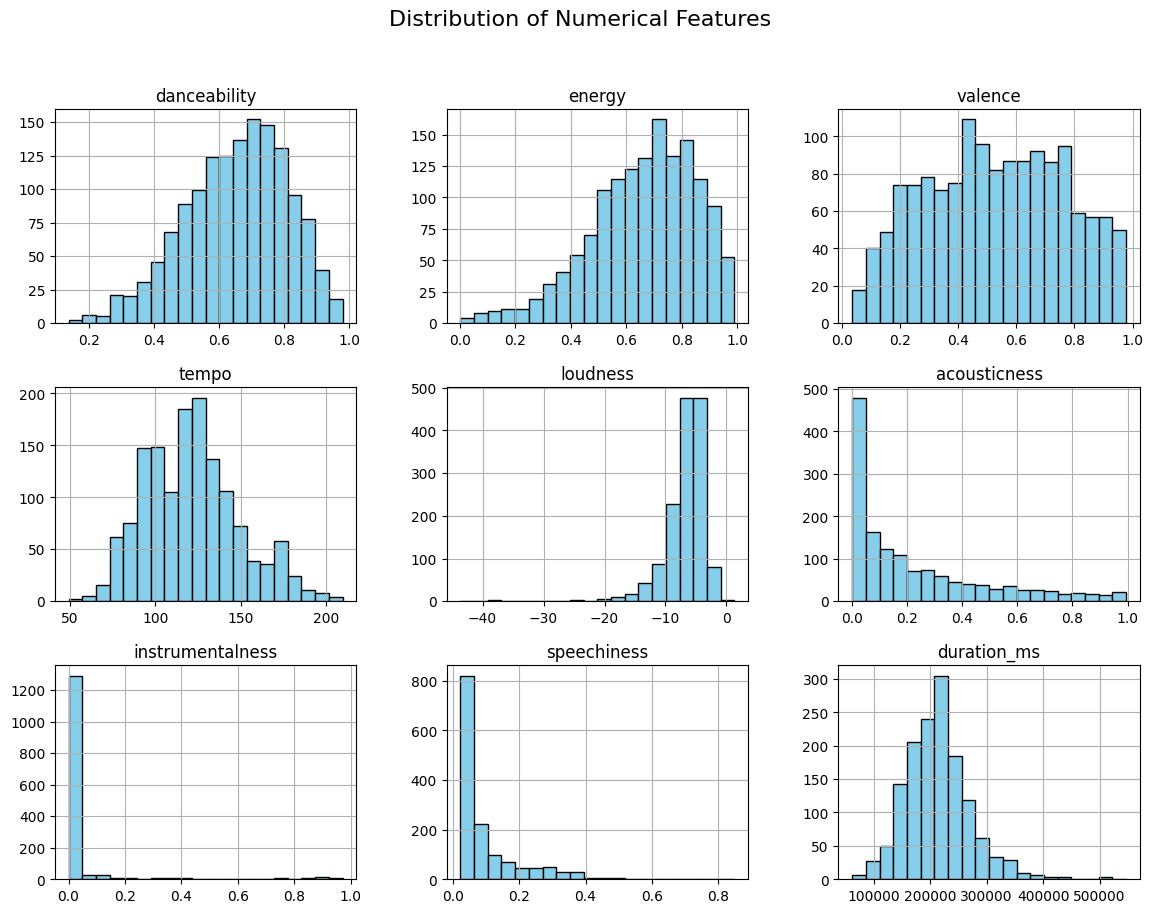

In [12]:
import matplotlib.pyplot as plt

# numerical column
numerical_features = [
    'danceability', 'energy', 'valence', 'tempo', 'loudness',
    'acousticness', 'instrumentalness', 'speechiness', 'duration_ms'
]

# visualization - matplotlib
df_high[numerical_features].hist(bins=20, figsize=(14,10), color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.show()

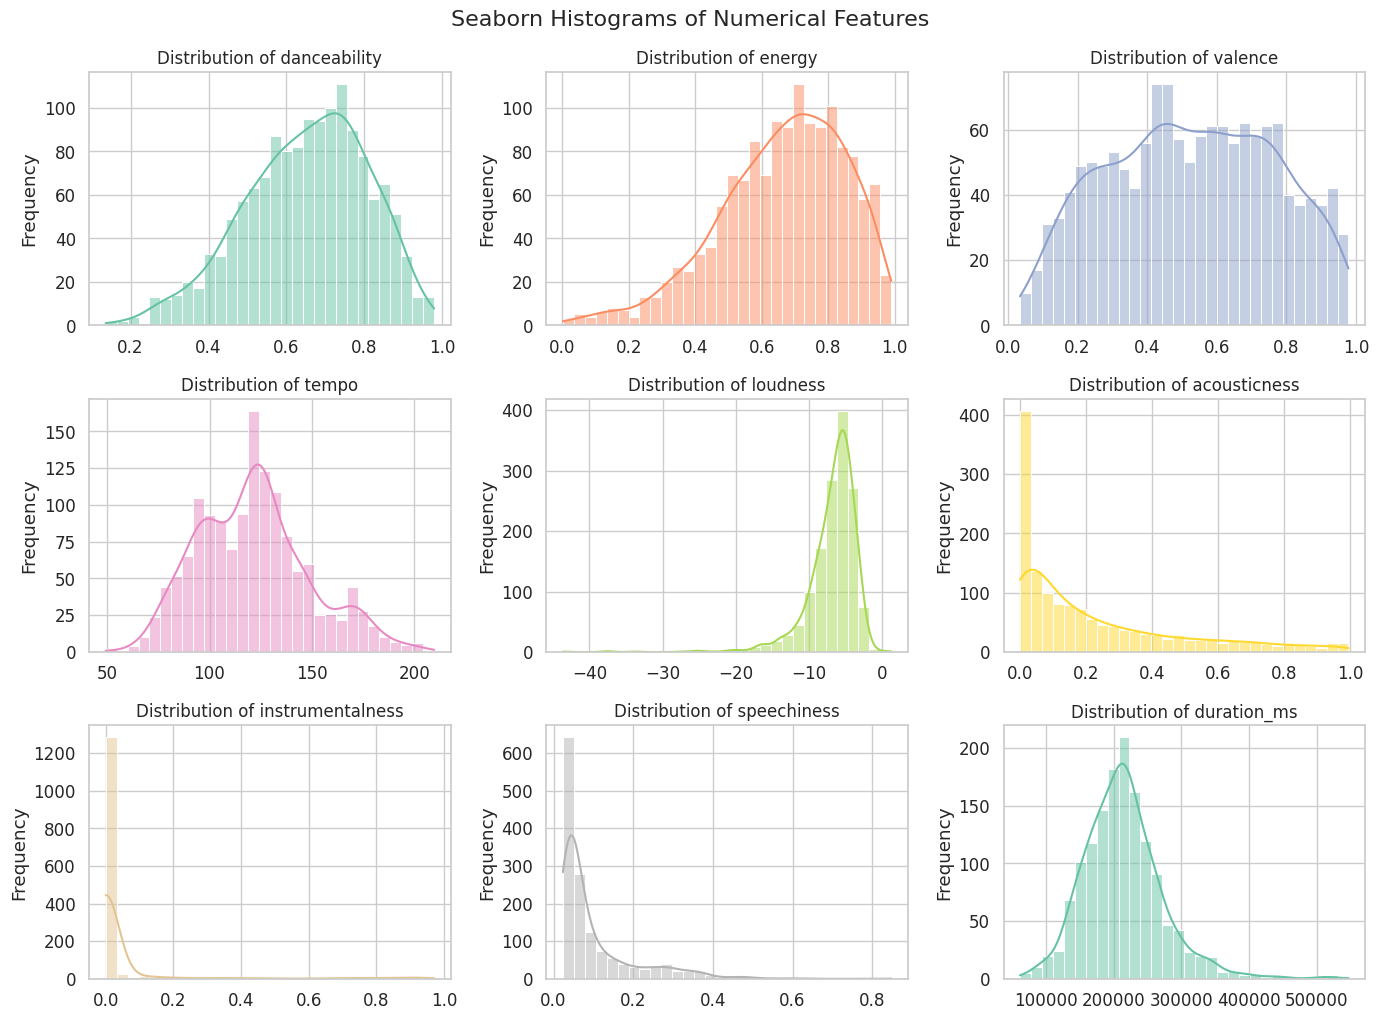

In [13]:
# visualization - seaborn
import seaborn as sns

sns.set(style="whitegrid", palette="pastel", font_scale=1.1)

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_features):
    sns.histplot(df_high[col], bins=30, kde=True, ax=axes[i], color=sns.color_palette("Set2")[i % 8])
    axes[i].set_title(f"Distribution of {col}", fontsize=12)
    axes[i].set_xlabel("")

    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.suptitle("Seaborn Histograms of Numerical Features", fontsize=16, y=1.02)
plt.show()

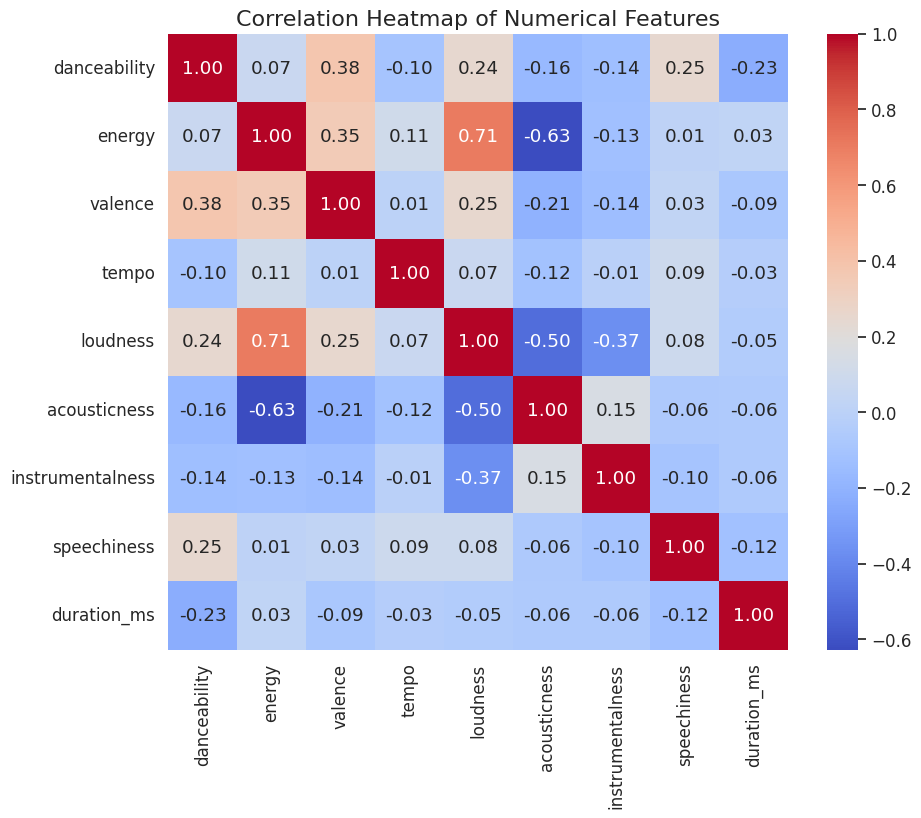

In [14]:
# Caculate Correlation

corr = df_high[numerical_features].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.show()

In [15]:
# -----------------------------------------------여기서 부터 다시 개발 (10/28 화)-----------------------------------------------------
# Select Feature

object_cols = df_high.select_dtypes(include='object').columns

cols_to_drop = [col for col in object_cols if col != 'playlist_genre']

df_high_select = df_high.drop(columns=cols_to_drop)

df_high_select.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1436 entries, 0 to 1685
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   energy            1436 non-null   float64
 1   tempo             1436 non-null   float64
 2   danceability      1436 non-null   float64
 3   playlist_genre    1436 non-null   object 
 4   loudness          1436 non-null   float64
 5   liveness          1436 non-null   float64
 6   valence           1436 non-null   float64
 7   time_signature    1436 non-null   int64  
 8   speechiness       1436 non-null   float64
 9   track_popularity  1436 non-null   int64  
 10  instrumentalness  1436 non-null   float64
 11  mode              1436 non-null   int64  
 12  key               1436 non-null   int64  
 13  duration_ms       1436 non-null   int64  
 14  acousticness      1436 non-null   float64
dtypes: float64(9), int64(5), object(1)
memory usage: 179.5+ KB


In [16]:
# Data scailing

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Select numerical columns
numeric_cols = [col for col in df_high_select.columns if col != 'playlist_genre']

# MinMax Scaling
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_high_select[numeric_cols])

df_scaled = pd.DataFrame(scaled_data, columns=numeric_cols)

# One-Hot Encoding
encoder = OneHotEncoder(sparse_output=False, drop=None)
genre_encoded = encoder.fit_transform(df_high_select[['playlist_genre']])
genre_encoded_df = pd.DataFrame(genre_encoded, columns=encoder.get_feature_names_out(['playlist_genre']))

# Concat
df_high_scaled = pd.concat([df_scaled.reset_index(drop=True), genre_encoded_df.reset_index(drop=True)], axis=1)

df_high_scaled.head()

,energy,tempo,danceability,loudness,liveness,valence,time_signature,speechiness,track_popularity,instrumentalness,...,playlist_genre_lofi,playlist_genre_metal,playlist_genre_pop,playlist_genre_punk,playlist_genre_r&b,playlist_genre_reggae,playlist_genre_rock,playlist_genre_soul,playlist_genre_turkish,playlist_genre_world
0,0.597325,0.677528,0.456702,0.798122,0.108719,0.530322,0.50,0.008729,1.00000,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.511327,0.347125,0.724792,0.744848,0.103337,0.427481,0.75,0.015276,0.90625,0.062616,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.815862,0.369385,0.495848,0.878410,0.148547,0.357506,0.75,0.016489,0.78125,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.919060,0.396931,0.633452,0.880613,0.304629,0.796438,0.75,0.048739,0.40625,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.790569,0.621774,0.760380,0.871556,0.359526,0.958651,0.75,0.287100,0.93750,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
user_df = pd.read_csv('/content/drive/MyDrive/user_listening_history_v1-1.csv')
user_df

,user_id,track_id,playcount
0,0d4c7bb92305cf1e4fe6bfbc2a9acaa3d284d603,0Hf4aIJpsN4Os2f0y0VqWl,3
1,0d4c7bb92305cf1e4fe6bfbc2a9acaa3d284d603,14DLZ9FaTofhnXBiV38axE,2
2,0d4c7bb92305cf1e4fe6bfbc2a9acaa3d284d603,1QPreu0BNOrUfEb8HTd2qG,5
3,0d4c7bb92305cf1e4fe6bfbc2a9acaa3d284d603,20I8RduZC2PWMWTDCZuuAN,6
4,0d4c7bb92305cf1e4fe6bfbc2a9acaa3d284d603,2V65y3PX4DkRhy1djlxd9p,11
...,...,...,...
295,fcf21e5ea31026d36f1ef7e4b0aa93fd783103fc,64CovjRwInpOJW4PiGMprY,10
296,fcf21e5ea31026d36f1ef7e4b0aa93fd783103fc,6mFkJmJqdDVQ1REhVfGgd1,10
297,fcf21e5ea31026d36f1ef7e4b0aa93fd783103fc,6wkHR8cU4INbp145hngbQO,8
298,fcf21e5ea31026d36f1ef7e4b0aa93fd783103fc,78lgmZwycJ3nzsdgmPPGNx,7


In [18]:
from sklearn.neighbors import NearestNeighbors

# track structure
track_vec_dict = dict(zip(df_high['track_id'], df_high_scaled.values))

# user_vector
user_vectors = {}

for user_id, group in user_df.groupby('user_id'):
    valid_tracks = [t for t in group['track_id'] if t in track_vec_dict]
    if not valid_tracks:
        continue
    weights = group.loc[group['track_id'].isin(valid_tracks), 'playcount'].values
    vectors = np.vstack([track_vec_dict[t] for t in valid_tracks])

    # playcount weighted average
    user_vector = np.average(vectors, axis=0, weights=weights)
    user_vectors[user_id] = user_vector

In [19]:
# 🎧 KNN Model
X = df_high_scaled.values
track_ids = df_high['track_id'].values

knn = NearestNeighbors(n_neighbors=10, metric='cosine')
knn.fit(X)

NearestNeighbors(metric='cosine', n_neighbors=10)

In [20]:
# Recommend track (Use Cosain Similarity)
from sklearn.metrics.pairwise import cosine_similarity

track_info_dict = df_high.set_index('track_id')[['track_name', 'track_artist', 'playlist_genre']].to_dict('index')

def recommend_for_user_vector(user_id, n_recommendations=10):
    if user_id not in user_vectors:
        print("No user")
        return

    user_vec = user_vectors[user_id].reshape(1, -1)

    # cosain similarities between user/track vector
    similarities = cosine_similarity(user_vec, df_high_scaled.values)[0]

    # top indexes
    top_indices = np.argsort(similarities)[::-1][:n_recommendations]
    top_scores = similarities[top_indices]
    top_track_ids = [track_ids[i] for i in top_indices]

    # Result
    rec_data = []
    for tid, score in zip(top_track_ids, top_scores):
        if tid in track_info_dict:
            info = track_info_dict[tid]
            rec_data.append([info['track_name'], info['track_artist'], info['playlist_genre'], round(score, 4)])
        else:
            rec_data.append([tid, None, None, round(score, 4)])

    # Result Frame
    rec_df = pd.DataFrame(rec_data, columns=['Track Name', 'Artist', 'Genre', 'Similarity'])
    print(f"\nRecommended Songs for user: {user_id}")
    display(rec_df)
    return rec_df

In [21]:
# All User List
unique_users = user_df['user_id'].unique()
print(f"{len(unique_users)} Users")

# recommend for every users
for uid in unique_users:
    recommend_for_user_vector(user_id=uid, n_recommendations=10)

20 Users

Recommended Songs for user: 0d4c7bb92305cf1e4fe6bfbc2a9acaa3d284d603


,Track Name,Artist,Genre,Similarity
0,Starships,Nicki Minaj,pop,0.8978
1,Disturbia,Rihanna,pop,0.8956
2,Family Affair,Mary J. Blige,r&b,0.8949
3,Play Hard (feat. Ne-Yo & Akon),"David Guetta, Ne-Yo, Akon",electronic,0.8949
4,BAND4BAND (feat. Lil Baby),"Central Cee, Lil Baby",hip-hop,0.8948
5,Let Me Love You,Mario,r&b,0.8947
6,SPIDER,"GIMS, DYSTINCT",hip-hop,0.8945
7,On Top,Karan Aujla,hip-hop,0.8944
8,The Largest,BigXthaPlug,hip-hop,0.8939
9,Sativa,"Jhené Aiko, Swae Lee",r&b,0.8933



Recommended Songs for user: 2ebcdda7e5bb29db6385a6705a4b885a4e8be1b5


,Track Name,Artist,Genre,Similarity
0,Juicy - 2005 Remaster,The Notorious B.I.G.,hip-hop,0.9106
1,Run It Up (feat. Offset & Moneybagg Yo),"Lil Tjay, Offset, Moneybagg Yo",hip-hop,0.9083
2,Amigos y Enemigos (feat. Bad Bunny & Almighty)...,"Trap Capos, Noriel, Bad Bunny, Almighty",hip-hop,0.9074
3,BAND4BAND (feat. Lil Baby),"Central Cee, Lil Baby",hip-hop,0.9038
4,Marry You,Bruno Mars,pop,0.8999
5,the perfect pair,beabadoobee,pop,0.8989
6,Tip Toe,HYBS,pop,0.8980
7,SICKO MODE,Travis Scott,hip-hop,0.8974
8,One Love,Shubh,hip-hop,0.8964
9,Girls Just Want to Have Fun,Cyndi Lauper,pop,0.8954



Recommended Songs for user: 67c9b563dbae5e4debf83dcf70f8fcace5db37b5


,Track Name,Artist,Genre,Similarity
0,Free Mind,Tems,ambient,0.9306
1,Would That I,Hozier,ambient,0.9239
2,Somebody That I Used To Know,"Gotye, Kimbra",pop,0.9229
3,Thinking out Loud,Ed Sheeran,pop,0.9177
4,Belong Together,Mark Ambor,pop,0.9163
5,Jingle Bell Rock,Bobby Helms,pop,0.9159
6,Mamma Mia,ABBA,pop,0.9154
7,Nothing New (feat. Phoebe Bridgers) (Taylor’s ...,"Taylor Swift, Phoebe Bridgers",ambient,0.9153
8,Girls Just Want to Have Fun,Cyndi Lauper,pop,0.9146
9,Best of My Love,The Emotions,pop,0.9144



Recommended Songs for user: 6c5f906dce1eaf270bd11f0c3cfcee1dbe72acd3


,Track Name,Artist,Genre,Similarity
0,Can't Stop,Red Hot Chili Peppers,rock,0.9483
1,Supermassive Black Hole,Muse,rock,0.9476
2,This Charming Man - 2011 Remaster,The Smiths,rock,0.9458
3,Too Sweet,Hozier,rock,0.9439
4,Como te extraño mi amor,Café Tacvba,rock,0.9438
5,White Wedding - Pt. 1,Billy Idol,rock,0.9436
6,Clavado en Un Bar,Maná,rock,0.9433
7,Hurts So Good,John Mellencamp,rock,0.9414
8,Song 2 - 2012 Remaster,Blur,rock,0.9413
9,Glory Days,Bruce Springsteen,rock,0.9411



Recommended Songs for user: 6fc94a3d0b3ee9fdbcede27c2cdb642dfceb8ab2


,Track Name,Artist,Genre,Similarity
0,Black & White,Juice WRLD,arabic,0.9145
1,Stand By Me (feat. Morgan Wallen),"Lil Durk, Morgan Wallen",arabic,0.9109
2,Feel This Moment (feat. Christina Aguilera),"Pitbull, Christina Aguilera",pop,0.9103
3,Don't Worry (with Ray Dalton) - Radio Edit,"Madcon, Ray Dalton",pop,0.9095
4,Shake It Off,Taylor Swift,pop,0.9084
5,Stronger,Young Jonn,afrobeats,0.9080
6,Get Up (Rattle) [feat. Far East Movement] - Vo...,"Bingo Players, Far East Movement",pop,0.9079
7,Hasta Que Dios Diga,"Anuel AA, Bad Bunny",latin,0.9074
8,Marry You,Bruno Mars,pop,0.9072
9,Un Coco,Bad Bunny,latin,0.9058



Recommended Songs for user: 7281decf7f5c642aecaa5fbd31317f45fe21cdcb


,Track Name,Artist,Genre,Similarity
0,The Adults Are Talking,The Strokes,rock,0.9095
1,Supermassive Black Hole,Muse,rock,0.9090
2,White Wedding - Pt. 1,Billy Idol,rock,0.9075
3,Clavado en Un Bar,Maná,rock,0.9045
4,Es Por Ti,Juanes,rock,0.9032
5,Sweet Child O' Mine,Guns N' Roses,rock,0.9018
6,Fly Away,Lenny Kravitz,rock,0.9015
7,Inolvidable,Reik,rock,0.9008
8,Girls Just Want to Have Fun,Cyndi Lauper,pop,0.9006
9,Hysteria,Def Leppard,rock,0.9005



Recommended Songs for user: 7b6939cd71c6e2ea73fec2a86bf1cf293720328e


,Track Name,Artist,Genre,Similarity
0,Juicy - 2005 Remaster,The Notorious B.I.G.,hip-hop,0.9168
1,Amigos y Enemigos (feat. Bad Bunny & Almighty)...,"Trap Capos, Noriel, Bad Bunny, Almighty",hip-hop,0.9132
2,Run It Up (feat. Offset & Moneybagg Yo),"Lil Tjay, Offset, Moneybagg Yo",hip-hop,0.9129
3,Hypnotize - 2014 Remaster,The Notorious B.I.G.,hip-hop,0.9126
4,Still Think About You,A Boogie Wit da Hoodie,hip-hop,0.9093
5,6locc 6a6y,Lil Loaded,hip-hop,0.9093
6,BAND4BAND (feat. Lil Baby),"Central Cee, Lil Baby",hip-hop,0.9079
7,Mr. Glock,Key Glock,hip-hop,0.9072
8,Leave Me Alone,BigXthaPlug,hip-hop,0.9053
9,Ambition For Cash,Key Glock,hip-hop,0.9051



Recommended Songs for user: a888a52132c0dbc9bbabffbcbbd9e4e0a2025af2


,Track Name,Artist,Genre,Similarity
0,Dilemma,"Nelly, Kelly Rowland",r&b,0.9459
1,Sativa,"Jhené Aiko, Swae Lee",r&b,0.9408
2,Always On Time,"Ja Rule, Ashanti",r&b,0.9362
3,No Love (with SZA),"Summer Walker, SZA",r&b,0.9357
4,Let Me Love You,Mario,r&b,0.9316
5,Language,"Paperboy Fabe, Brent Faiyaz",r&b,0.9273
6,The Boy Is Mine,"Brandy, Monica",r&b,0.9254
7,Family Affair,Mary J. Blige,r&b,0.9237
8,Because Of You,Ne-Yo,r&b,0.9208
9,Miss Independent,Ne-Yo,r&b,0.9195



Recommended Songs for user: ac6cd49cbe7b87bba0858d530ebbae5c5d28b2a3


,Track Name,Artist,Genre,Similarity
0,Otro Atardecer,"Bad Bunny, The Marías",latin,0.9686
1,"Yo x Ti, Tu x Mi","ROSALÍA, Ozuna",latin,0.9644
2,Si Veo a Tu Mamá,Bad Bunny,latin,0.9607
3,DEPORTIVO,"Blessd, Anuel AA",latin,0.9605
4,Volví,"Aventura, Bad Bunny",latin,0.9573
5,PROVENZA,KAROL G,latin,0.9568
6,Con Altura,"ROSALÍA, J Balvin, El Guincho",latin,0.9540
7,Después de la Playa,Bad Bunny,latin,0.9533
8,Volando - Remix,"Mora, Bad Bunny, Sech",latin,0.9531
9,Inolvidable,"Ovy On The Drums, Beéle",latin,0.9529



Recommended Songs for user: b5eaef5a02bbd56fa7be24b1fd010eb1cae9cdba


,Track Name,Artist,Genre,Similarity
0,Love The Way You Lie,"Eminem, Rihanna",blues,0.8925
1,Say My Name,Destiny's Child,blues,0.8905
2,No Love,"Eminem, Lil Wayne",blues,0.8839
3,Apologize,OneRepublic,blues,0.8817
4,Agora Hills,Doja Cat,gaming,0.8815
5,Brown Munde,"AP Dhillon, Gminxr, Gurinder Gill, Shinda Kahlon",indian,0.8797
6,Kiss from a Rose,Seal,blues,0.8788
7,Hate That I Love You,"Rihanna, Ne-Yo",blues,0.8761
8,Godzilla (feat. Juice WRLD),"Eminem, Juice WRLD",gaming,0.8749
9,Sacrifice,Elton John,blues,0.8740



Recommended Songs for user: cd169e6bbde5b63b9bfbdad998b45bb30cfaf029


,Track Name,Artist,Genre,Similarity
0,Como te extraño mi amor,Café Tacvba,rock,0.9336
1,Supermassive Black Hole,Muse,rock,0.9334
2,Hurts So Good,John Mellencamp,rock,0.9314
3,Too Sweet,Hozier,rock,0.9303
4,Give It To Me,"Timbaland, Justin Timberlake, Nelly Furtado",pop,0.9302
5,Can't Stop,Red Hot Chili Peppers,rock,0.9285
6,White Wedding - Pt. 1,Billy Idol,rock,0.9284
7,A Dios Le Pido,Juanes,rock,0.9274
8,Es Por Ti,Juanes,rock,0.9264
9,Inolvidable,Reik,rock,0.9253



Recommended Songs for user: ce84a0de7cae70f3ef5ababd59a9ed55e5eabceb


,Track Name,Artist,Genre,Similarity
0,Still Think About You,A Boogie Wit da Hoodie,hip-hop,0.9397
1,Run It Up (feat. Offset & Moneybagg Yo),"Lil Tjay, Offset, Moneybagg Yo",hip-hop,0.9342
2,Hypnotize - 2014 Remaster,The Notorious B.I.G.,hip-hop,0.9331
3,Juicy - 2005 Remaster,The Notorious B.I.G.,hip-hop,0.9320
4,6locc 6a6y,Lil Loaded,hip-hop,0.9319
5,One Love,Shubh,hip-hop,0.9311
6,BOOKER T,Bad Bunny,hip-hop,0.9296
7,Amigos y Enemigos (feat. Bad Bunny & Almighty)...,"Trap Capos, Noriel, Bad Bunny, Almighty",hip-hop,0.9292
8,BAND4BAND (feat. Lil Baby),"Central Cee, Lil Baby",hip-hop,0.9287
9,SICKO MODE,Travis Scott,hip-hop,0.9269



Recommended Songs for user: cedc0de9183c8f57efe78ab33b2ae40d6bad8d5a


,Track Name,Artist,Genre,Similarity
0,Clavado en Un Bar,Maná,rock,0.9245
1,BAND4BAND (feat. Lil Baby),"Central Cee, Lil Baby",hip-hop,0.9216
2,White Wedding - Pt. 1,Billy Idol,rock,0.9215
3,Supermassive Black Hole,Muse,rock,0.9205
4,Still D.R.E.,"Dr. Dre, Snoop Dogg",hip-hop,0.9205
5,Vampire Empire,Big Thief,rock,0.9201
6,Hypnotize - 2014 Remaster,The Notorious B.I.G.,hip-hop,0.9192
7,SICKO MODE,Travis Scott,hip-hop,0.9188
8,Juicy - 2005 Remaster,The Notorious B.I.G.,hip-hop,0.9179
9,Lust,Lil Skies,hip-hop,0.9173



Recommended Songs for user: d2f5731b0c098d1c1794ca8dfb9d04ba4b5e36ac


,Track Name,Artist,Genre,Similarity
0,Pa Ti Estoy,"Ozuna, Anuel AA, Chris Jedi",latin,0.9215
1,Es Por Ti,Juanes,rock,0.9205
2,Cómo Te Atreves,Morat,latin,0.9198
3,Hasta Que Dios Diga,"Anuel AA, Bad Bunny",latin,0.9185
4,Volando - Remix,"Mora, Bad Bunny, Sech",latin,0.9175
5,Supermassive Black Hole,Muse,rock,0.9167
6,ALMAS GEMELAS,Myke Towers,latin,0.9143
7,Est-ce que tu m'aimes ? - Pilule bleue,GIMS,electronic,0.9139
8,Lollipop,Darell,latin,0.9135
9,Start Me Up - Remastered 2009,The Rolling Stones,rock,0.9130



Recommended Songs for user: dadfccbce096dda7aeaf1a395aa5d0b2fa49cd50


,Track Name,Artist,Genre,Similarity
0,Vampire Empire,Big Thief,rock,0.9097
1,THE SHADE,Rex Orange County,rock,0.9081
2,Rock the Casbah - Remastered,The Clash,rock,0.9060
3,Es Por Ti,Juanes,rock,0.9041
4,Everybody Wants To Rule The World,Tears For Fears,rock,0.9039
5,Como te extraño mi amor,Café Tacvba,rock,0.9036
6,Metamodernity,Vansire,rock,0.9033
7,Supermassive Black Hole,Muse,rock,0.9026
8,White Wedding - Pt. 1,Billy Idol,rock,0.9014
9,Hurts So Good,John Mellencamp,rock,0.8995



Recommended Songs for user: e033f1b2bcb86f540af9a1f4adbf8541c89cf4ec


,Track Name,Artist,Genre,Similarity
0,Es Por Ti,Juanes,rock,0.9307
1,The Adults Are Talking,The Strokes,rock,0.9260
2,Supermassive Black Hole,Muse,rock,0.9256
3,Under Pressure - Remastered 2011,"Queen, David Bowie",rock,0.9251
4,You Get What You Give,New Radicals,rock,0.9231
5,Should I Stay or Should I Go - Remastered,The Clash,rock,0.9217
6,Uprising,Muse,rock,0.9212
7,THE SHADE,Rex Orange County,rock,0.9201
8,Inolvidable,Reik,rock,0.9187
9,Start Me Up - Remastered 2009,The Rolling Stones,rock,0.9184



Recommended Songs for user: e0fcfd88dbbfc8329ba956a012d2465c52f65e24


,Track Name,Artist,Genre,Similarity
0,Poker Face,Lady Gaga,pop,0.9359
1,Girls Just Want to Have Fun,Cyndi Lauper,pop,0.9356
2,Get Up (Rattle) [feat. Far East Movement] - Vo...,"Bingo Players, Far East Movement",pop,0.9342
3,Don't Worry (with Ray Dalton) - Radio Edit,"Madcon, Ray Dalton",pop,0.9328
4,Lady - Hear Me Tonight,Modjo,pop,0.9314
5,Don't Go Breaking My Heart,"Elton John, Kiki Dee",pop,0.9314
6,Ride Wit Me,"Nelly, City Spud",pop,0.9308
7,Give It To Me,"Timbaland, Justin Timberlake, Nelly Furtado",pop,0.9308
8,Hot N Cold,Katy Perry,pop,0.9306
9,I Kissed A Girl,Katy Perry,pop,0.9305



Recommended Songs for user: effd0fae7ecfb2fe6ec05fe880ef9e17b0d83f93


,Track Name,Artist,Genre,Similarity
0,Down,"Jay Sean, Lil Wayne",blues,0.9567
1,Apologize,OneRepublic,blues,0.9438
2,"It Must Have Been Love - From the Film ""Pretty...",Roxette,blues,0.9422
3,I'm Alive,Céline Dion,blues,0.9410
4,When I See U,Fantasia,blues,0.9354
5,We Belong Together,Mariah Carey,blues,0.9354
6,Love The Way You Lie,"Eminem, Rihanna",blues,0.9282
7,Baby Can I Hold You,Tracy Chapman,blues,0.9247
8,Mad,Ne-Yo,blues,0.9238
9,Stand By Me,Ben E. King,blues,0.9167



Recommended Songs for user: fad0b1fc4a5e70ebfead73dbcea823cc4473bac1


,Track Name,Artist,Genre,Similarity
0,Free Mind,Tems,ambient,0.9022
1,Give Me Everything (feat. Nayer),"Pitbull, AFROJACK, Ne-Yo, Nayer",electronic,0.8964
2,Never Going Home Tonight (feat. Madison Love),"David Guetta, Alesso, Madison Love",electronic,0.8936
3,Makeba - Ian Asher Remix,"Jain, Ian Asher",electronic,0.8930
4,MONTAGEM - PR FUNK,"S3BZS, Mc Gw, Mc Menor Do Alvorada",gaming,0.8924
5,Would That I,Hozier,ambient,0.8914
6,Est-ce que tu m'aimes ? - Pilule bleue,GIMS,electronic,0.8885
7,Perfect Strangers,"Jonas Blue, JP Cooper",electronic,0.8883
8,Automotivo Bibi Fogosa,"Bibi Babydoll, Dj Brunin XM, KZA Produções",gaming,0.8853
9,Under Control (feat. Hurts),"Calvin Harris, Alesso, Hurts",electronic,0.8852



Recommended Songs for user: fcf21e5ea31026d36f1ef7e4b0aa93fd783103fc


,Track Name,Artist,Genre,Similarity
0,The Adults Are Talking,The Strokes,rock,0.9471
1,Es Por Ti,Juanes,rock,0.9403
2,Learn to Fly,Foo Fighters,rock,0.9399
3,Run To You,Bryan Adams,rock,0.9369
4,Don't Stop Believin',Journey,rock,0.9368
5,Supermassive Black Hole,Muse,rock,0.9351
6,You Get What You Give,New Radicals,rock,0.9341
7,Uprising,Muse,rock,0.9338
8,Fly Away,Lenny Kravitz,rock,0.9327
9,Inolvidable,Reik,rock,0.9323
